# Lab Assignment: 1
<h4>Name: Sanjushree Rajan</h4>
<h4>Reg No: BL.EN.U4AIE23130</h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import simpleaudio as sa
import librosa
from scipy import signal
from scipy.io import wavfile
import warnings
import IPython.display as ipd
warnings.filterwarnings('ignore')

# Objective 1: Record and Analyze Your Own Voice

# 1. Load Recording and Check Properties

In [2]:
recorded_audio, sr_recorded = sf.read('test.wav')

info = sf.info('test.wav')
sample_rate = info.samplerate

print("=" * 50)
print("RECORDING PROPERTIES")
print("=" * 50)
print(f"Sampling Rate: {info.samplerate} Hz")
print(f"Bit Depth: {info.subtype}")
print(f"Channels: {info.channels}")
print(f"Duration: {info.duration:.2f} seconds")
print(f"Number of Frames: {info.frames}")
print("=" * 50)

RECORDING PROPERTIES
Sampling Rate: 22050 Hz
Bit Depth: PCM_16
Channels: 1
Duration: 7.58 seconds
Number of Frames: 167226


# 2. Play Back Recording

In [3]:
ipd.Audio('test.wav', rate=sample_rate)

# Objective 2: Basic Operations on Speech Signals

# 1. Import and Read Speech File

In [4]:
speech_file = 'test.wav'

speech_signal, sample_rate = librosa.load(speech_file, sr=None)

print(f"Speech file loaded successfully: {speech_file}")
print(f"Sample Rate: {sample_rate} Hz")
print(f"Signal Shape: {speech_signal.shape}")

Speech file loaded successfully: test.wav
Sample Rate: 22050 Hz
Signal Shape: (167226,)


# 2. Plot Waveform and Display Basic Information

SPEECH SIGNAL INFORMATION
Sample Rate: 22050 Hz
Number of Samples: 167226
Total Duration: 7.584 seconds
Active Speech Duration: 4.859 seconds
Silence Duration: 2.725 seconds


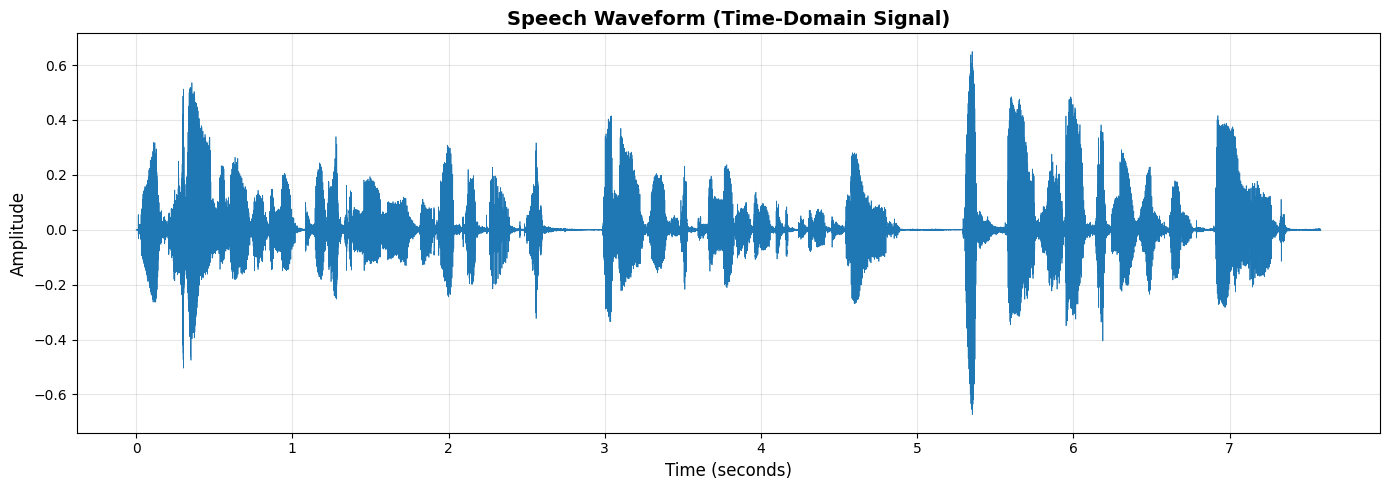

In [5]:
num_samples = len(speech_signal)
duration = num_samples / sample_rate
time_axis = np.linspace(0, duration, num_samples)

frame_length = int(0.025 * sample_rate)
hop_length = int(0.010 * sample_rate)

energy = librosa.feature.rms(y=speech_signal, frame_length=frame_length, hop_length=hop_length)[0]

silence_threshold = 0.02
active_frames = energy > silence_threshold
active_speech_duration = np.sum(active_frames) * hop_length / sample_rate

print("=" * 60)
print("SPEECH SIGNAL INFORMATION")
print("=" * 60)
print(f"Sample Rate: {sample_rate} Hz")
print(f"Number of Samples: {num_samples}")
print(f"Total Duration: {duration:.3f} seconds")
print(f"Active Speech Duration: {active_speech_duration:.3f} seconds")
print(f"Silence Duration: {duration - active_speech_duration:.3f} seconds")
print("=" * 60)

plt.figure(figsize=(14, 5))
plt.plot(time_axis, speech_signal, linewidth=0.5)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Amplitude', fontsize=12)
plt.title('Speech Waveform (Time-Domain Signal)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.i. Slicing and Normalization

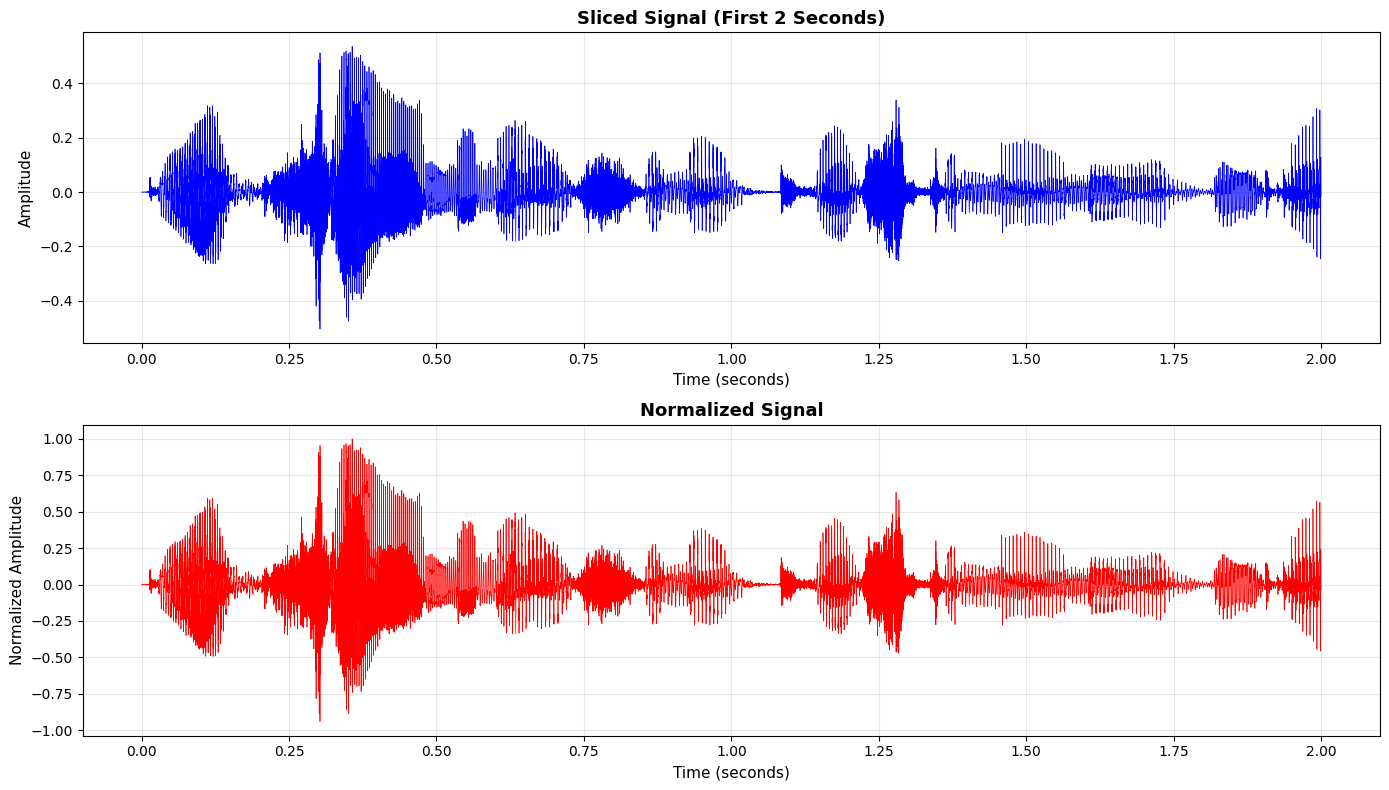

Sliced Signal - Min: -0.5041, Max: 0.5355
Normalized Signal - Min: -0.9413, Max: 1.0000


In [6]:
slice_duration = 2.0
slice_samples = int(slice_duration * sample_rate)
sliced_signal = speech_signal[:slice_samples]

max_amplitude = np.max(np.abs(sliced_signal))
if max_amplitude > 0:
    normalized_signal = sliced_signal / max_amplitude
else:
    normalized_signal = sliced_signal

time_sliced = np.linspace(0, slice_duration, len(sliced_signal))

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(time_sliced, sliced_signal, linewidth=0.5, color='blue')
axes[0].set_xlabel('Time (seconds)', fontsize=11)
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title('Sliced Signal (First 2 Seconds)', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(time_sliced, normalized_signal, linewidth=0.5, color='red')
axes[1].set_xlabel('Time (seconds)', fontsize=11)
axes[1].set_ylabel('Normalized Amplitude', fontsize=11)
axes[1].set_title('Normalized Signal', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Sliced Signal - Min: {np.min(sliced_signal):.4f}, Max: {np.max(sliced_signal):.4f}")
print(f"Normalized Signal - Min: {np.min(normalized_signal):.4f}, Max: {np.max(normalized_signal):.4f}")

# 3.ii. Amplification and De-amplification

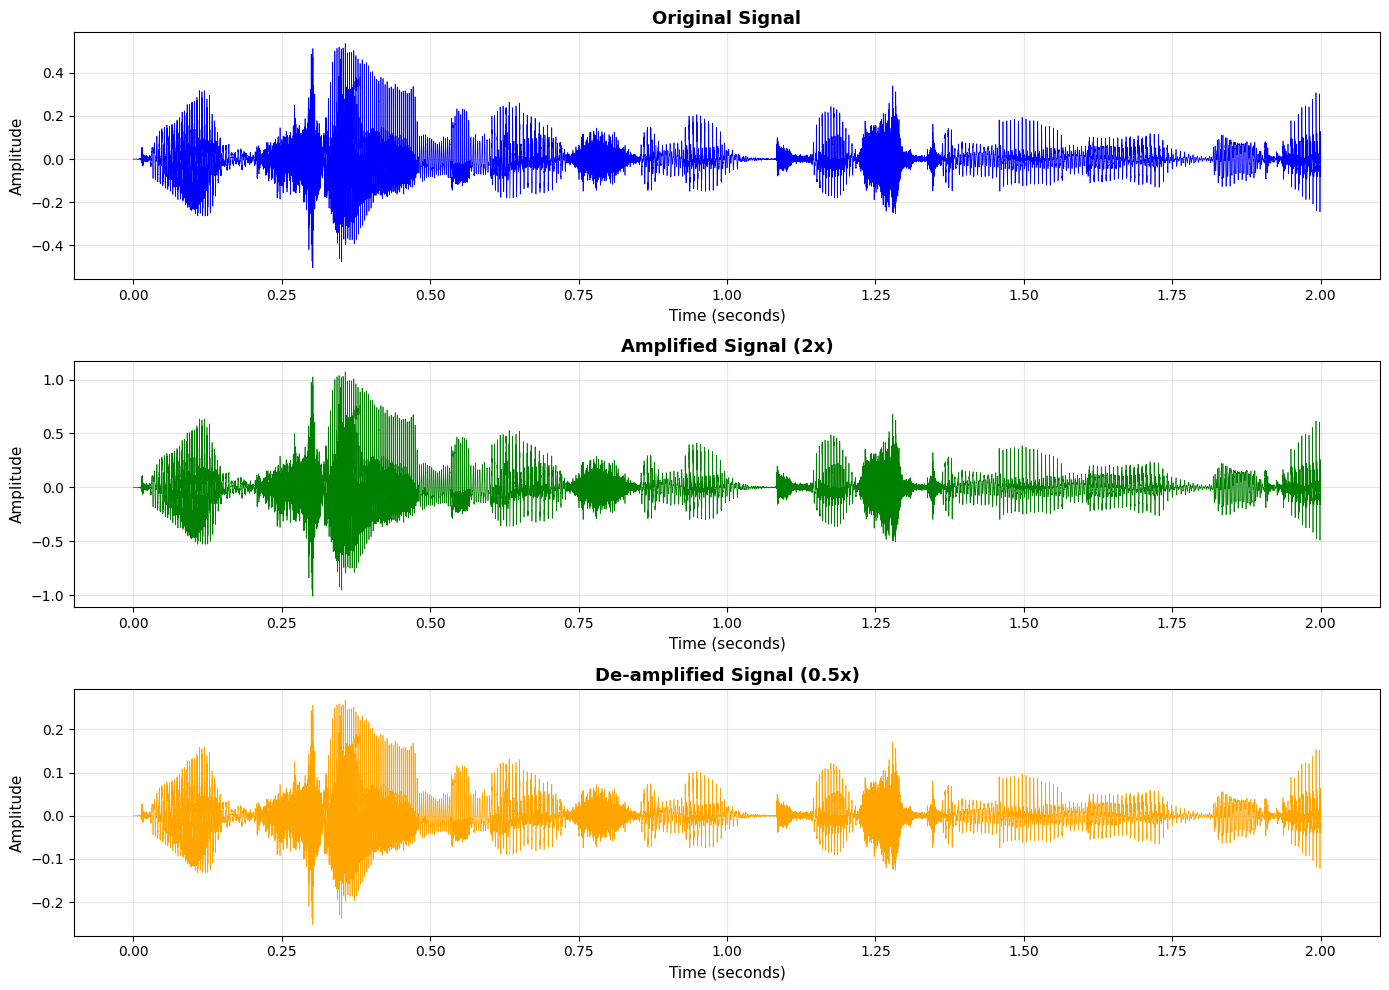

Original Signal - Max Amplitude: 0.5355
Amplified Signal - Max Amplitude: 1.0710
De-amplified Signal - Max Amplitude: 0.2677


In [7]:
amplification_factor = 2.0
amplified_signal = sliced_signal * amplification_factor

deamplification_factor = 0.5
deamplified_signal = sliced_signal * deamplification_factor

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(time_sliced, sliced_signal, linewidth=0.5, color='blue')
axes[0].set_xlabel('Time (seconds)', fontsize=11)
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title('Original Signal', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(time_sliced, amplified_signal, linewidth=0.5, color='green')
axes[1].set_xlabel('Time (seconds)', fontsize=11)
axes[1].set_ylabel('Amplitude', fontsize=11)
axes[1].set_title(f'Amplified Signal (2x)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

axes[2].plot(time_sliced, deamplified_signal, linewidth=0.5, color='orange')
axes[2].set_xlabel('Time (seconds)', fontsize=11)
axes[2].set_ylabel('Amplitude', fontsize=11)
axes[2].set_title(f'De-amplified Signal (0.5x)', fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Original Signal - Max Amplitude: {np.max(np.abs(sliced_signal)):.4f}")
print(f"Amplified Signal - Max Amplitude: {np.max(np.abs(amplified_signal)):.4f}")
print(f"De-amplified Signal - Max Amplitude: {np.max(np.abs(deamplified_signal)):.4f}")

# 3.ii. Up-sampling and Down-sampling

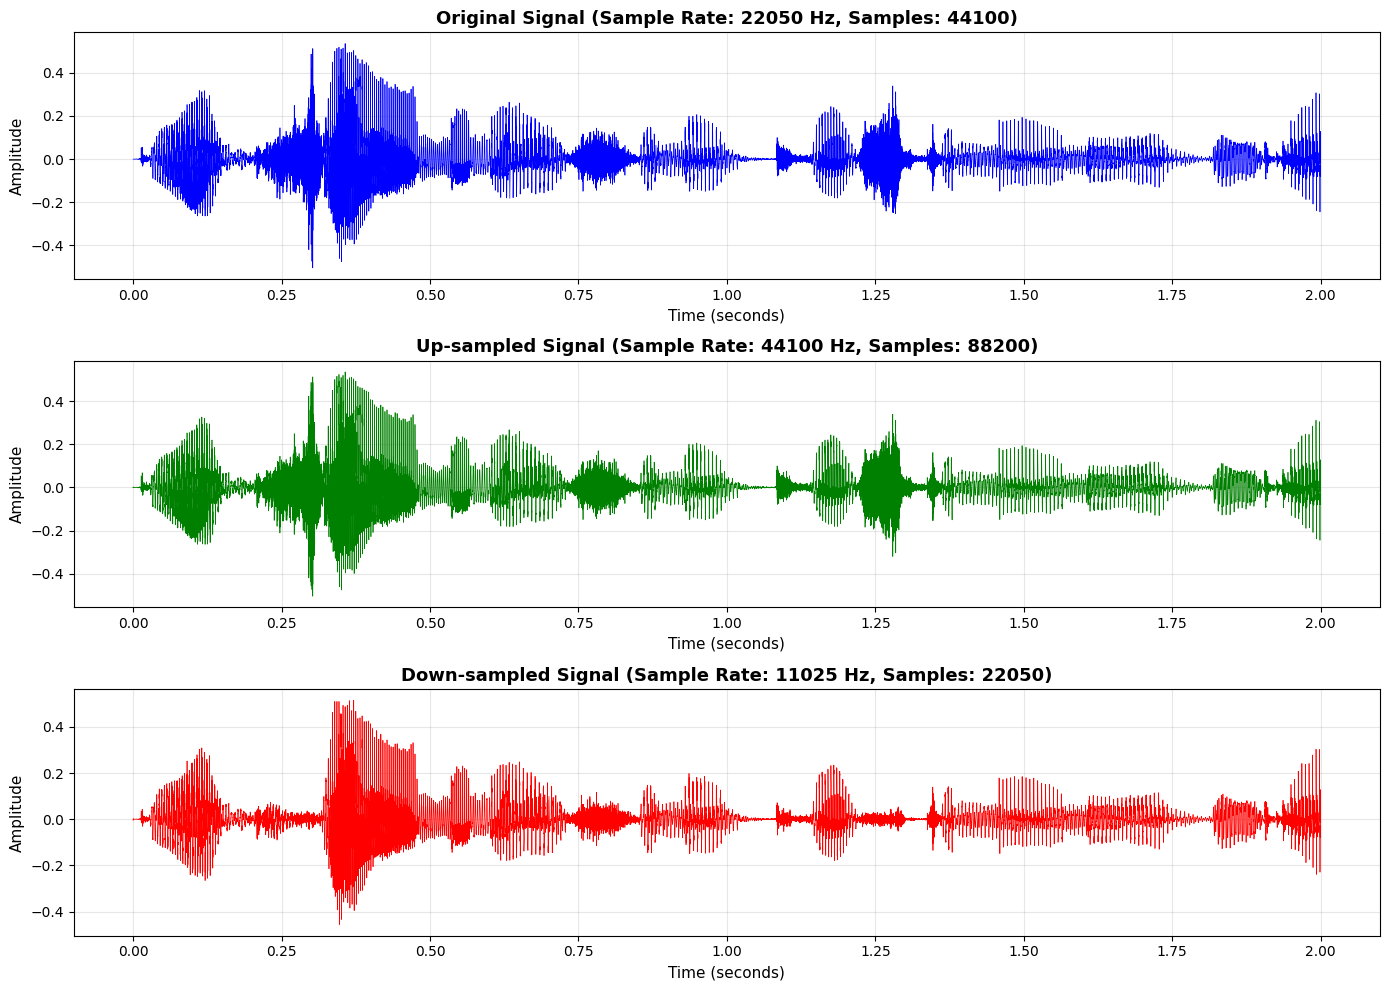

Original: 22050 Hz, 44100 samples
Up-sampled: 44100 Hz, 88200 samples
Down-sampled: 11025 Hz, 22050 samples


In [8]:
upsampling_factor = 2
upsampled_signal = signal.resample(sliced_signal, len(sliced_signal) * upsampling_factor)
upsampled_rate = sample_rate * upsampling_factor
time_upsampled = np.linspace(0, slice_duration, len(upsampled_signal))

downsampling_factor = 2
downsampled_signal = signal.resample(sliced_signal, len(sliced_signal) // downsampling_factor)
downsampled_rate = sample_rate // downsampling_factor
time_downsampled = np.linspace(0, slice_duration, len(downsampled_signal))

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

axes[0].plot(time_sliced, sliced_signal, linewidth=0.5, color='blue')
axes[0].set_xlabel('Time (seconds)', fontsize=11)
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title(f'Original Signal (Sample Rate: {sample_rate} Hz, Samples: {len(sliced_signal)})', 
                  fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(time_upsampled, upsampled_signal, linewidth=0.5, color='green')
axes[1].set_xlabel('Time (seconds)', fontsize=11)
axes[1].set_ylabel('Amplitude', fontsize=11)
axes[1].set_title(f'Up-sampled Signal (Sample Rate: {upsampled_rate} Hz, Samples: {len(upsampled_signal)})', 
                  fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

axes[2].plot(time_downsampled, downsampled_signal, linewidth=0.5, color='red')
axes[2].set_xlabel('Time (seconds)', fontsize=11)
axes[2].set_ylabel('Amplitude', fontsize=11)
axes[2].set_title(f'Down-sampled Signal (Sample Rate: {downsampled_rate} Hz, Samples: {len(downsampled_signal)})', 
                  fontsize=13, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Original: {sample_rate} Hz, {len(sliced_signal)} samples")
print(f"Up-sampled: {upsampled_rate} Hz, {len(upsampled_signal)} samples")
print(f"Down-sampled: {downsampled_rate} Hz, {len(downsampled_signal)} samples")

# 3.iii. Identify Voiced/Unvoiced/Silence Portions

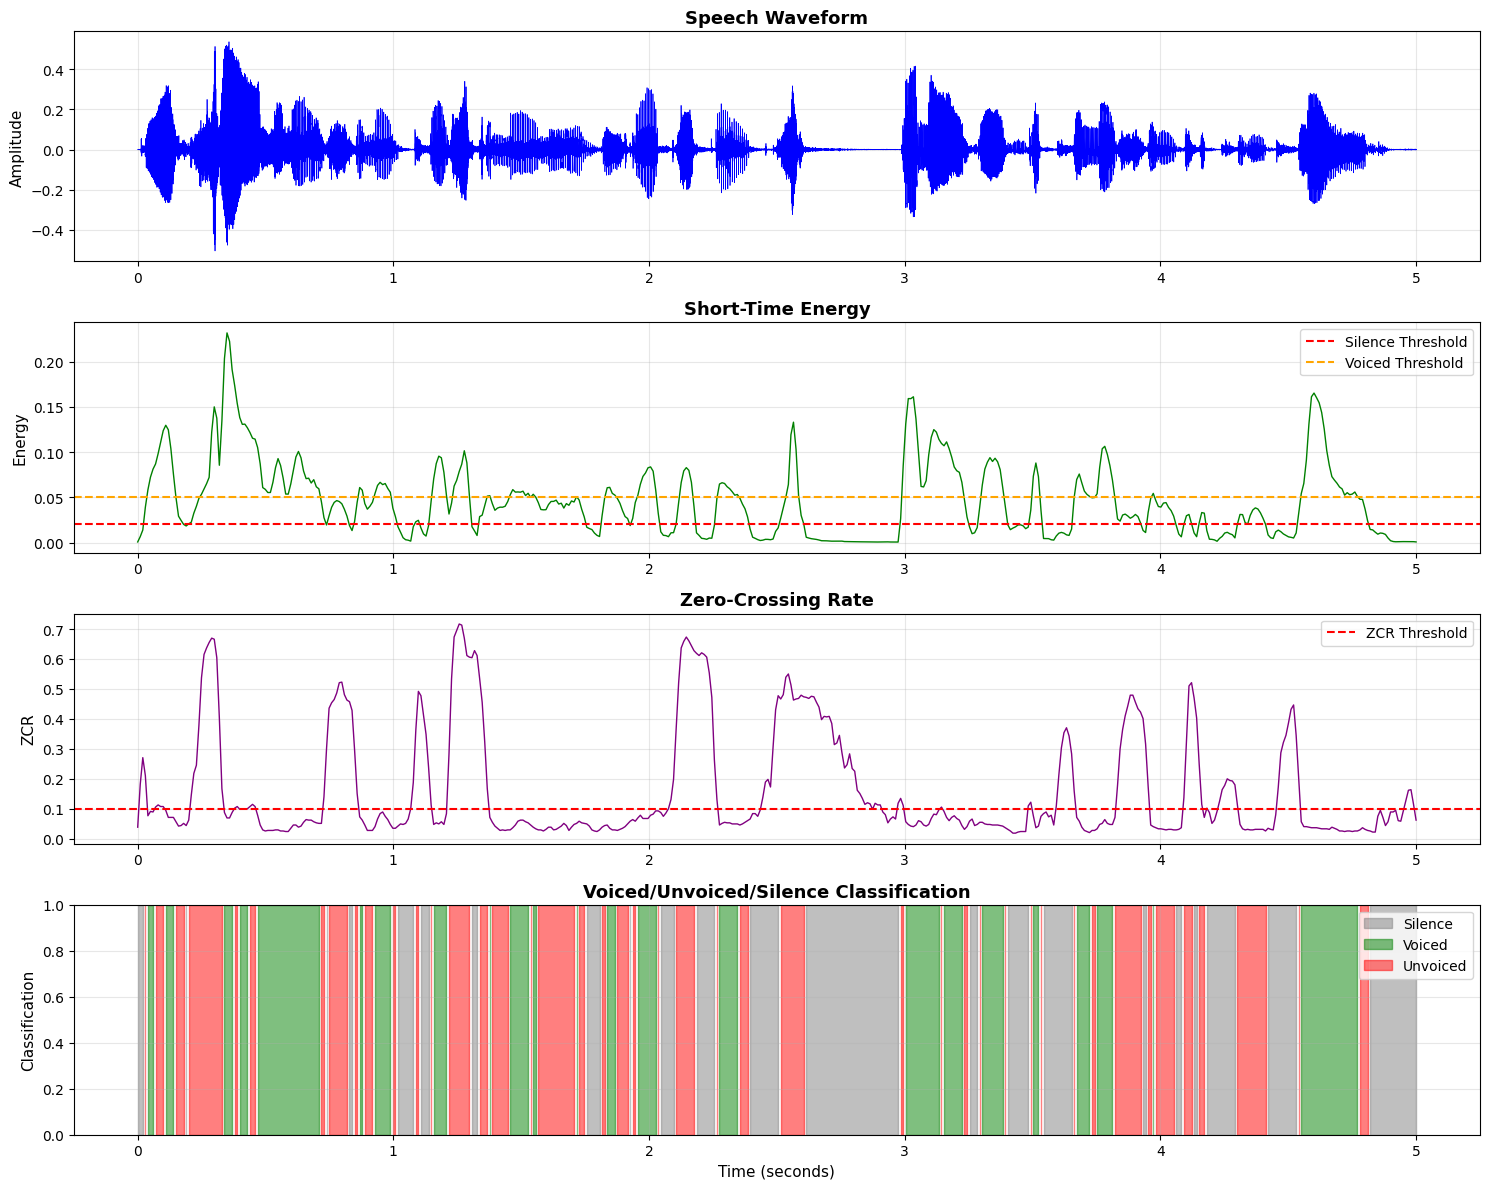

SPEECH CLASSIFICATION STATISTICS
Silence: 33.1%
Voiced: 31.5%
Unvoiced: 35.5%


In [9]:
analysis_duration = min(5.0, duration)
analysis_samples = int(analysis_duration * sample_rate)
analysis_signal = speech_signal[:analysis_samples]
time_analysis = np.linspace(0, analysis_duration, analysis_samples)

frame_len = int(0.025 * sample_rate)
hop_len = int(0.010 * sample_rate)

energy = librosa.feature.rms(y=analysis_signal, frame_length=frame_len, hop_length=hop_len)[0]

zcr = librosa.feature.zero_crossing_rate(analysis_signal, frame_length=frame_len, hop_length=hop_len)[0]

frames = len(energy)
time_frames = np.linspace(0, analysis_duration, frames)

energy_threshold_silence = 0.02
energy_threshold_voiced = 0.05
zcr_threshold = 0.1

classification = np.zeros(frames)
for i in range(frames):
    if energy[i] < energy_threshold_silence:
        classification[i] = 0 
    elif energy[i] >= energy_threshold_voiced and zcr[i] < zcr_threshold:
        classification[i] = 1 
    else:
        classification[i] = 2 

fig, axes = plt.subplots(4, 1, figsize=(15, 12))

axes[0].plot(time_analysis, analysis_signal, linewidth=0.5, color='blue')
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].set_title('Speech Waveform', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(time_frames, energy, linewidth=1, color='green')
axes[1].axhline(y=energy_threshold_silence, color='r', linestyle='--', label='Silence Threshold')
axes[1].axhline(y=energy_threshold_voiced, color='orange', linestyle='--', label='Voiced Threshold')
axes[1].set_ylabel('Energy', fontsize=11)
axes[1].set_title('Short-Time Energy', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(time_frames, zcr, linewidth=1, color='purple')
axes[2].axhline(y=zcr_threshold, color='r', linestyle='--', label='ZCR Threshold')
axes[2].set_ylabel('ZCR', fontsize=11)
axes[2].set_title('Zero-Crossing Rate', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

colors = ['gray', 'green', 'red']
labels = ['Silence', 'Voiced', 'Unvoiced']
for i in range(3):
    mask = classification == i
    axes[3].fill_between(time_frames, 0, 1, where=mask, alpha=0.5, color=colors[i], label=labels[i])

axes[3].set_ylabel('Classification', fontsize=11)
axes[3].set_xlabel('Time (seconds)', fontsize=11)
axes[3].set_title('Voiced/Unvoiced/Silence Classification', fontsize=13, fontweight='bold')
axes[3].set_ylim([0, 1])
axes[3].legend(loc='upper right')
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

silence_percent = np.sum(classification == 0) / frames * 100
voiced_percent = np.sum(classification == 1) / frames * 100
unvoiced_percent = np.sum(classification == 2) / frames * 100

print("=" * 50)
print("SPEECH CLASSIFICATION STATISTICS")
print("=" * 50)
print(f"Silence: {silence_percent:.1f}%")
print(f"Voiced: {voiced_percent:.1f}%")
print(f"Unvoiced: {unvoiced_percent:.1f}%")
print("=" * 50)

# Results and Inferences

# Dataset Description LJ Speech Dataset
This is a public domain speech dataset consisting of 13,100 short audio clips of a single speaker reading passages from 7 non-fiction books. A transcription is provided for each clip. Clips vary in length from 1 to 10 seconds and have a total length of approximately 24 hours.

The texts were published between 1884 and 1964, and are in the public domain. The audio was recorded in 2016-17 by the LibriVox project and is also in the public domain.

# Results

**Objective 1 - Audio Recording:**
- Sampling Rate: 22050 Hz, Bit Depth: 16-bit, Channels: Mono
- Duration: 7.58 seconds, Frames: 167,226 samples

**Objective 2 - Speech Analysis:**
- Active Speech: 4.859s (64.1%) | Silence: 2.725s (35.9%)
- Classification: Voiced 31.5%, Unvoiced 35.5%, Silence 33.1%
- Successfully performed slicing, normalization, amplification/de-amplification, and resampling operations

# Conclusion

Successfully demonstrated basic speech processing operations on LJ Speech Dataset. The experiment showed that speech signals exhibit clear amplitude variations corresponding to different sounds - high amplitudes for voiced sounds (vowels), rapid fluctuations for unvoiced sounds (consonants), and near-zero for silence. Short-time energy and zero-crossing rate are effective features for distinguishing and classifying speech segments into voiced, unvoiced, and silence portions. Signal operations like normalization, amplification, and resampling were successfully performed, which are fundamental techniques for voice activity detection, speech recognition, and audio processing applications.